# Segmentasi Pelanggan Mall dengan K-Means

Proyek ini bertujuan untuk mengelompokkan pelanggan mall ke dalam beberapa segmen berdasarkan pendapatan tahunan (`Annual Income`) dan skor pengeluaran (`Spending Score`). Segmentasi ini dapat membantu tim pemasaran untuk menargetkan strategi mereka secara lebih efektif.

**Langkah-langkah Analisis:**
1.  **Impor Library:** Memuat semua library yang dibutuhkan.
2.  **Muat Data:** Membaca dataset `Mall_Customers.csv`.
3.  **Eksplorasi Data (EDA):** Memahami struktur dan statistik dasar dari data.
4.  **Pemilihan Fitur:** Memilih fitur yang relevan untuk segmentasi (`Annual Income` dan `Spending Score`).
5.  **Metode Elbow:** Menentukan jumlah cluster (K) yang optimal.
6.  **Pelatihan Model K-Means:** Melatih model dengan K yang telah ditentukan.
7.  **Visualisasi Hasil:** Menampilkan cluster pelanggan dalam bentuk scatter plot.

## 1. Impor Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set_style('whitegrid')

## 2. Muat Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Eksplorasi Data (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Cek nilai null
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data bersih dan tidak memiliki nilai null. Selanjutnya, kita akan fokus pada fitur yang paling relevan untuk segmentasi.

## 4. Pemilihan Fitur

Untuk studi kasus ini, kita akan menggunakan `Annual Income (k$)` dan `Spending Score (1-100)` sebagai dasar segmentasi.

In [6]:
# Membuat dataframe baru yang hanya berisi fitur yang dipilih
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

## 5. Metode Elbow untuk Menentukan K Optimal

C:\Users\deniy\miniconda3\envs\mall_project\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\deniy\miniconda3\envs\mall_project\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\deniy\miniconda3\envs\mall_project\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\deniy\miniconda3\envs\mall_project\Lib\site-packages\sklearn\cluster\_

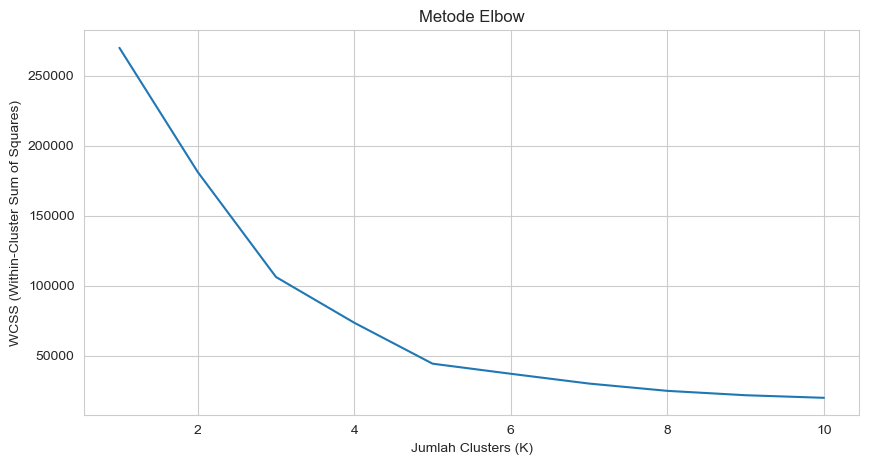

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

Dari plot di atas, penurunan WCSS yang paling signifikan melambat setelah K=5. Oleh karena itu, **K=5** adalah jumlah cluster yang optimal.

## 6. Pelatihan Model K-Means

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\deniy\miniconda3\envs\mall_project\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## 7. Visualisasi Hasil Segmentasi

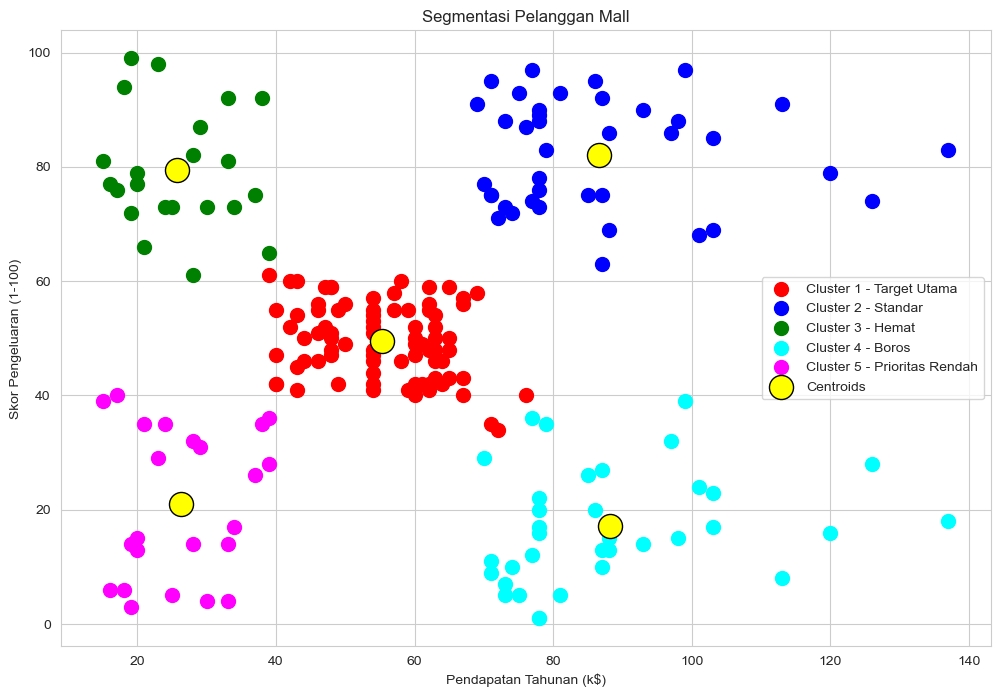

In [9]:
plt.figure(figsize=(12, 8))

# Plot data points untuk setiap cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1 - Target Utama')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2 - Standar')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3 - Hemat')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4 - Boros')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5 - Prioritas Rendah')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', edgecolors='black')

plt.title('Segmentasi Pelanggan Mall')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Pengeluaran (1-100)')
plt.legend()
plt.show()

### Interpretasi Cluster:

- **Cluster 1 (Target Utama):** Pendapatan tinggi, skor pengeluaran tinggi. Ini adalah pelanggan ideal.
- **Cluster 2 (Standar):** Pendapatan rata-rata, skor pengeluaran rata-rata. Pelanggan pada umumnya.
- **Cluster 3 (Hemat):** Pendapatan tinggi, skor pengeluaran rendah. Pelanggan yang berhati-hati dengan pengeluaran.
- **Cluster 4 (Boros):** Pendapatan rendah, skor pengeluaran tinggi. Mungkin pelanggan muda atau yang kurang bijak secara finansial.
- **Cluster 5 (Prioritas Rendah):** Pendapatan rendah, skor pengeluaran rendah. Tidak banyak berbelanja.